In [ ]:
#@title ライブラリのインストール

!pip install -q ultralytics
!git clone https://github.com/edihbrandon/RictyDiminished.git

import colorsys
import os
import random
import re

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFont
from pydantic import BaseModel
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.9/906.9 kB 14.8 MB/s eta 0:00:00
Cloning into 'RictyDiminished'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 25 (delta 0), reused 0 (delta 0), pack-reused 24 (from 1)
Receiving objects: 100% (25/25), 7.07 MiB | 14.08 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



ライブラリのバージョンの確認方法
```
# OpenCVのバージョン
import cv2
print(f"OpenCV (cv2) バージョン: {cv2.__version__}")

# NumPyのバージョン
import numpy as np
print(f"NumPy バージョン: {np.__version__}")

# Matplotlibのバージョン
import matplotlib
print(f"Matplotlib バージョン: {matplotlib.__version__}")

# Pillowのバージョン
import PIL
print(f"Pillow バージョン: {PIL.__version__}")

# Pydanticのバージョン
import pydantic
print(f"Pydantic バージョン: {pydantic.__version__}")

# Ultralyticsのバージョン
import ultralytics
print(f"Ultralytics バージョン: {ultralytics.__version__}")
```

```
OpenCV (cv2) バージョン: 4.10.0
NumPy バージョン: 1.26.4
Matplotlib バージョン: 3.10.0
Pillow バージョン: 11.1.0
Pydantic バージョン: 2.10.4
Ultralytics バージョン: 8.3.59
```

In [ ]:
#@title Google Driveに接続

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


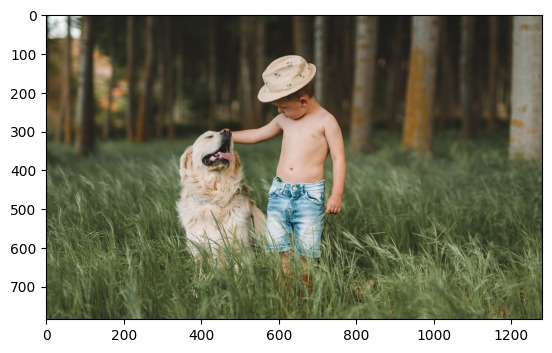

In [ ]:
#@title 画像の準備

img_dir = "/content/drive/MyDrive/Pixabay"  # @param {type:"string"}
img_filename = "child-6276604_1280.jpg"  # @param {type:"string"}

img_path = os.path.join(img_dir, img_filename)
img = cv2.imread(img_path)

plt.imshow(img[:,:,::-1])
plt.show()

In [ ]:
#@title インスタンスセグメンテーションモデルの準備

model = YOLO('yolov8m-seg.pt')

100%|██████████| 52.4M/52.4M [00:00<00:00, 194MB/s]


In [ ]:
#@title クラス一覧

classnames = model.names

print("クラスの数", len(classnames))
print(classnames)

クラスの数 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68


0: 416x640 1 person, 1 dog, 310.8ms
Speed: 28.7ms preprocess, 310.8ms inference, 2173.4ms postprocess per image at shape (1, 3, 416, 640)


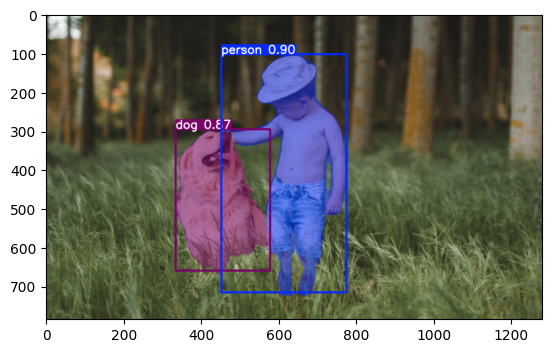

In [ ]:
#@title 推論

results = model.predict(img)

result_plot = results[0].plot()
plt.imshow(result_plot[:,:,::-1])
plt.show()

In [ ]:
#@title ラベルごとの信頼度スコア

INDEX = 0

print("ラベルID: ", results[0].boxes.cls.cpu().numpy().astype(int)[INDEX])
print("信頼度スコア: ", results[0].boxes.conf.cpu().numpy()[INDEX])
print("検出矩形の座標: ", results[0].boxes.xyxy.cpu().numpy()[INDEX])

ラベルID:  0
信頼度スコア:  0.9032101
検出矩形の座標:  [     452.26      103.12      775.46      716.84]


In [ ]:
#@title 検出した領域の座標

results[0].masks.data.cpu().numpy()[INDEX]  # 1の領域が対象

array([[          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       ...,
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0]], dtype=float32)

In [ ]:
#@title BBoxの定義

PATH_FONT = "/content/RictyDiminished/RictyDiminishedDiscord-Regular.ttf"
FONT_CACHE: "dict[int, ImageFont.FreeTypeFont]" = {}
CHAR_CACHE: "dict[str, dict[int, tuple[bool, tuple[int, int, int, int], np.ndarray]]]" = {}


class BBox(BaseModel):
    left: float
    top: float
    right: float
    bottom: float
    score: float
    label: int

    def draw(self, img, classnames, color_mapping):
        color = color_mapping[classnames[self.label]]
        cv2.rectangle(
            img,
            pt1=(int(self.left), int(self.top)),
            pt2=(int(self.right), int(self.bottom)),
            color=color,
            thickness=2,
        )

        self._put_text(img, color, classnames)


    def _put_text(self, img: np.ndarray, color, classnames):
        text = classnames.get(self.label, 'not found')
        pos = (int(self.left), int(self.top))
        size = 20

        text = re.sub(r"[\t\n\r]", "", text)
        h, w, *_ = img.shape
        d = img.ndim
        offset = 5
        for char in text:
            jp, bbox, mask = self._get_char_mask(char, size)

            li = pos[0] + bbox[0] + offset
            ti = pos[1] + bbox[1]
            ri = pos[0] + bbox[2] + offset
            bi = pos[1] + bbox[3]

            lm = 0
            tm = 0
            rm = ri - li
            bm = bi - ti

            offset += bbox[2] - bbox[0]

            if li < 0:
                lm -= li
                li = 0
            if ti < 0:
                tm -= ti
                ti = 0
            if ri > w:
                rm -= (ri - w)
                ri = w
            if bi > h:
                bm -= (bi - h)
                bi = h
            if ((ri - li) <= 0) or ((bi - ti) <= 0):
                continue
            if d == 3:
                img[ti:bi, li:ri] = img[ti:bi, li:ri] * (1 - mask[tm:bm, lm:rm, np.newaxis]) + color * mask[tm:bm, lm:rm, np.newaxis]
            else:
                img[ti:bi, li:ri] = img[ti:bi, li:ri] * (1 - mask[tm:bm, lm:rm]) + color * mask[tm:bm, lm:rm]


    @staticmethod
    def _get_char_mask(char: str, size: int):
        def _get_font(size: int) -> "ImageFont.FreeTypeFont":
            if size not in FONT_CACHE:
                FONT_CACHE[size] = ImageFont.truetype(PATH_FONT, size)
            return FONT_CACHE[size]

        if char not in CHAR_CACHE:
            CHAR_CACHE[char] = {}

        caches = CHAR_CACHE[char]
        if size not in caches:
            font = _get_font(size)
            jp = not char.isascii()
            bbox: "tuple[int, int, int, int]" = font.getbbox(char)
            mask: "np.ndarray" = np.asarray(font.getmask(char, "L")).reshape(bbox[3]-bbox[1], bbox[2] - bbox[0]).astype(float) / 255
            caches[size] = (jp, bbox, mask)
        return caches[size]

In [ ]:
#@title Maskの定義

class Mask:
    """
    セグメンテーションマスクを扱うクラス
    物体の領域を表す二値マスク（0/1）を管理し、画像への可視化を行う
    """
    def __init__(self, mask: np.ndarray):
        """
        初期化メソッド
        Args:
            mask: セグメンテーションマスク（2次元のNumPy配列、値は0または1）
                 1: 物体が存在する領域
                 0: 背景領域
        """
        self.mask: np.ndarray = mask

    def draw(self, img: np.ndarray, label, classnames, color_mapping, alpha=0.5) -> np.ndarray:
        """
        マスクを半透明で画像に重ねて描画する

        Args:
            img: 描画対象の画像（OpenCV形式、BGR）
            label: クラスラベル（インデックス）
            classnames: クラスIDと名前の対応辞書
            color_mapping: クラス名と描画色の対応辞書
            alpha: マスクの透明度（0.0-1.0、1.0が完全不透明）

        Returns:
            マスクが重ねられた画像
        """
        # ラベルに対応する色を取得
        color = color_mapping[classnames[label]]
        # マスクを画像に適用
        return self._apply_mask(img, color, alpha)

    def _apply_mask(self, img: np.ndarray, color: tuple[int, int, int], alpha=0.5) -> np.ndarray:
        """
        マスクを画像に適用する内部メソッド

        Args:
            img: 元の画像（OpenCV形式、BGR）
            color: マスクの色（BGR形式のタプル）
            alpha: マスクの透明度（0.0-1.0）

        Returns:
            マスクが適用された画像

        Note:
            マスクの適用は以下の式で計算:
            結果 = 元画像 * (1 - alpha) + マスク色 * alpha
        """
        # 各色チャンネルに対して処理
        for c in range(3):  # BGRの各チャンネルに対して
            # マスクが1の領域のみ色を重ねる
            # np.whereの使用:
            # - 条件: self.mask == 1（マスクが1の位置）
            # - True時: 元の画像とマスク色を混合
            # - False時: 元の画像をそのまま使用
            img[:, :, c] = np.where(
                self.mask == 1,                            # マスクが1の領域
                img[:, :, c] * (1 - alpha) + alpha * color[c],  # マスク領域の色計算
                img[:, :, c]                              # マスク外は元の色
            )

In [ ]:
#@title Detectionの定義

class Detection:
   """
   物体検出の結果（バウンディングボックスとマスク）を扱うクラス
   バウンディングボックスによる物体の位置検出と、
   セグメンテーションマスクによる物体領域の検出を統合して管理する
   """
   def __init__(self, bbox: BBox, mask: Mask):
       """
       初期化メソッド
       Args:
           bbox: 検出された物体の境界ボックス情報
           mask: 検出された物体のセグメンテーションマスク
       """
       self.bbox: BBox = bbox
       self.mask: Mask = mask

   def draw(self, img, classnames, color_mapping):
       """
       検出結果を画像上に描画するメソッド
       バウンディングボックスとマスクの両方を描画する

       Args:
           img: 描画対象の画像
           classnames: クラスIDと名前の対応辞書
           color_mapping: クラス名と描画色の対応辞書
       """
       # まずバウンディングボックスを描画
       self.bbox.draw(img, classnames, color_mapping)
       # 次にマスクを半透明で重ねる
       self.mask.draw(img, self.bbox.label, classnames, color_mapping)

   @classmethod
   def postprocess(cls, result) -> "Detection":
       """
       YOLOの推論結果からDetectionオブジェクトを生成するクラスメソッド

       Args:
           result: YOLOの推論結果（バウンディングボックスとマスク情報を含む）

       Returns:
           Detection: 生成された検出結果オブジェクト
       """
       # バウンディングボックス情報を生成
       bbox = cls._create_bbox(result)
       # マスク情報を生成
       mask = cls._create_mask(result)
       # 新しいDetectionインスタンスを生成して返す
       return cls(bbox, mask)

   @staticmethod
   def _create_bbox(result) -> BBox:
       """
       YOLOの推論結果からバウンディングボックスを生成する

       Args:
           result: YOLOの推論結果

       Returns:
           BBox: 生成されたバウンディングボックスオブジェクト
       """
       # バウンディングボックスの座標をCPUに転送しNumPy配列に変換
       xyxy = result.boxes.xyxy.cpu().numpy()[0]

       return BBox(
           left=int(xyxy[0]),    # 左端のx座標
           top=int(xyxy[1]),     # 上端のy座標
           right=int(xyxy[2]),   # 右端のx座標
           bottom=int(xyxy[3]),  # 下端のy座標
           # 検出の信頼度スコア
           score=float(result.boxes.conf.cpu().numpy()[0]),
           # 検出されたクラスのラベル
           label=int(result.boxes.cls.cpu().numpy()[0])
       )

   @staticmethod
   def _create_mask(result) -> Mask:
       """
       YOLOの推論結果からセグメンテーションマスクを生成する

       Args:
           result: YOLOの推論結果

       Returns:
           Mask: 生成されたマスクオブジェクト（マスクが存在しない場合はNone）

       Note:
           - マスクは元画像のサイズにリサイズされる
           - 最近傍補間を使用して二値マスクの性質を保持
       """
       # 元画像のサイズを取得
       shape = result.orig_shape

       # マスクが存在する場合のみ処理
       if result.masks is not None:
           # マスクデータをCPUに転送しNumPy配列に変換
           mask_data = result.masks.data.cpu().numpy()[0]
           # マスクを元画像のサイズにリサイズ
           # cv2.INTER_NEAREST: 最近傍補間（二値マスクの値を保持）
           resized_mask = cv2.resize(
               mask_data,
               (shape[1], shape[0]),  # 幅, 高さの順
               interpolation=cv2.INTER_NEAREST
           )
           return Mask(resized_mask)
       else:
           return None

In [ ]:
#@title 結果の再整理

detections = [Detection.postprocess(result) for result in results[0]]
for det in detections:
    print("det.bbox", det.bbox)
    print("det.mask", det.mask)

det.bbox left=452.0 top=103.0 right=775.0 bottom=716.0 score=0.9032101035118103 label=0
det.mask <__main__.Mask object at 0x7e69ce486ce0>
det.bbox left=334.0 top=296.0 right=578.0 bottom=660.0 score=0.8697777390480042 label=16
det.mask <__main__.Mask object at 0x7e69ce678dc0>


In [ ]:
#@title 色の準備

GOLDEN_RATIO = 0.618033988749895

def get_color(idx: int, s: float = 0.8, vmin: float = 0.7) -> tuple[int, int, int]:
        h = np.fmod(idx * GOLDEN_RATIO, 1.0)
        v = 1.0 - np.fmod(idx * GOLDEN_RATIO, 1.0 - vmin)
        r, g, b = colorsys.hsv_to_rgb(h, s, v)
        return (int(255 * b), int(255 * g), int(255 * r))

color_mapping = {
            element: get_color(idx)
            for idx, element in enumerate(classnames.values())
        }

In [ ]:
#@title 描画

result_img = img.copy()

for det in detections:
    det.draw(result_img, classnames, color_mapping)

plt.figure(dpi=300)
plt.imshow(result_img[:,:,::-1])
plt.show()

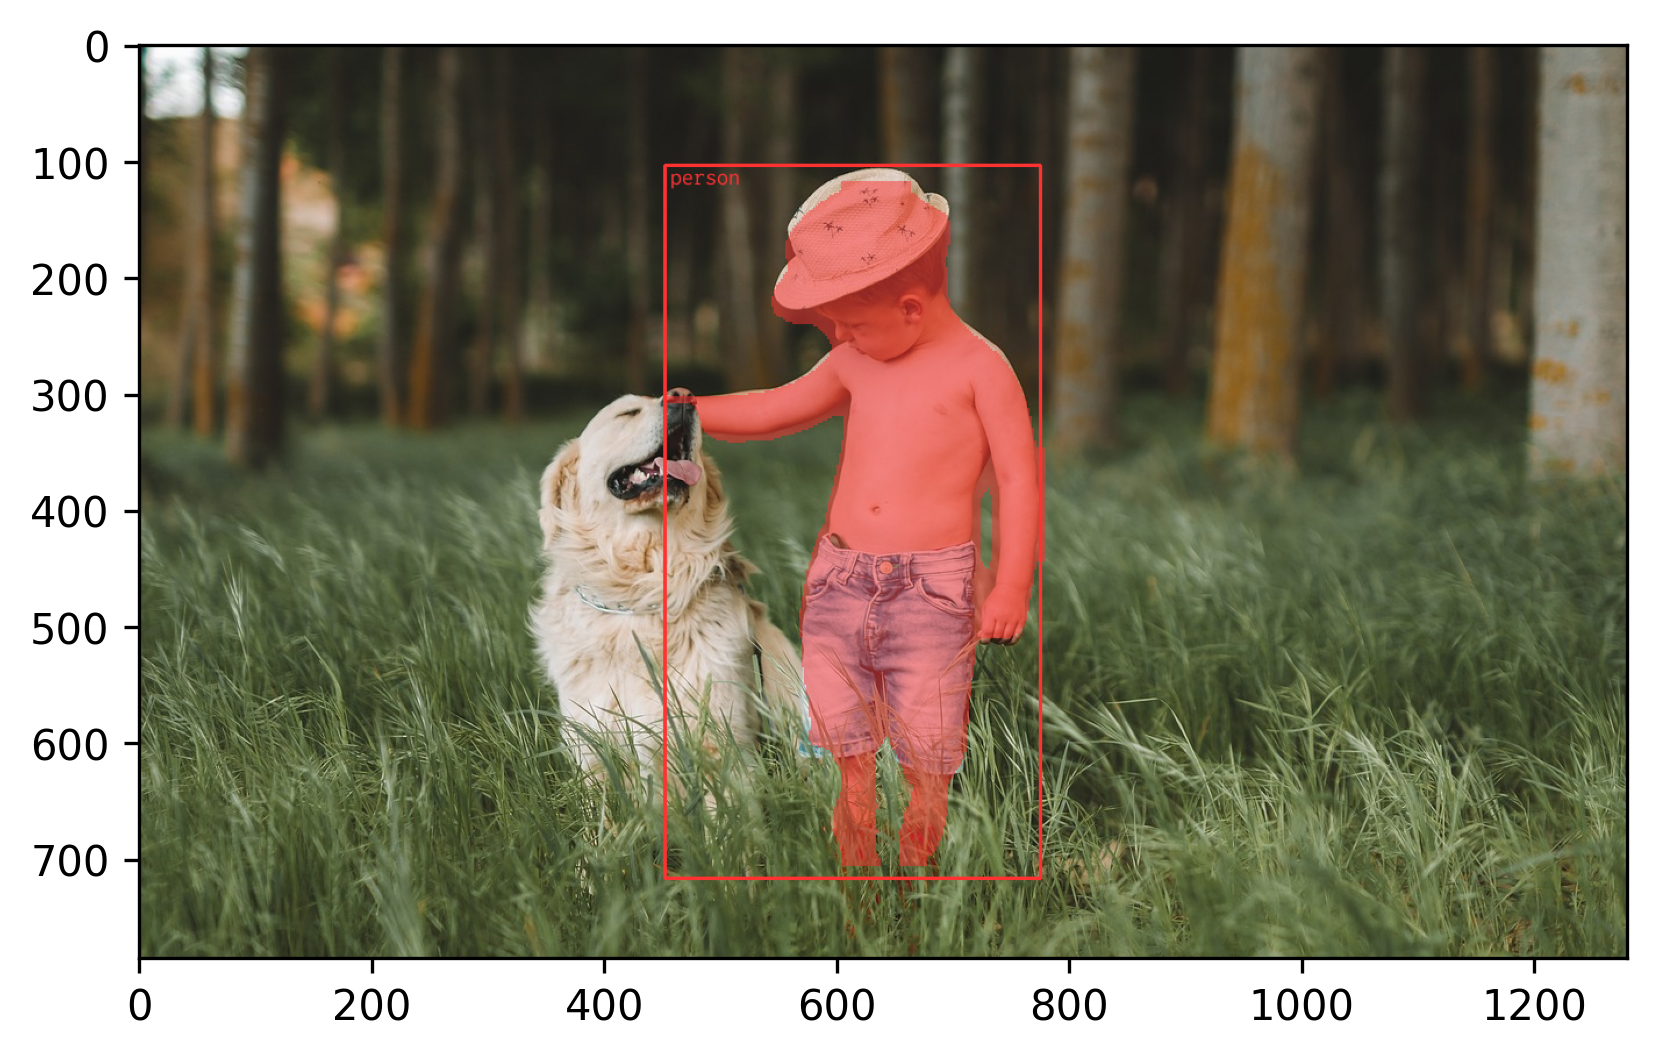

In [ ]:
#@title 描画（人物のみ）

result_img = img.copy()

person_detections = list(filter(lambda x: x.bbox.label == 0, detections))

for det in person_detections:
    det.draw(result_img, classnames, color_mapping)


plt.figure(dpi=300)
plt.imshow(result_img[:,:,::-1])
plt.show()